In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from Data.Featurisation import data_handeler
import numpy as np
import torch
from scale import Scale
from hyperparameters.hyperparameters import hyperparameters_source
from Models.lstm import LSTM
from tensors.Tensorisation import Tensorisation
import scienceplots
plt.rcdefaults()
plt.style.use(['science'])
avg_rmse = pd.read_pickle("evaluation/Target/avg_rmse.pkl")
avg_times = pd.read_pickle("evaluation/Target/avg_times.pkl")
rmse = pd.read_pickle("evaluation/Target/rmse.pkl")
time = pd.read_pickle("evaluation/Target/times.pkl")
time = time.loc[:,(slice(None), 'Training Time')]
sites = range(9)
models = [0,1,5,6,2,3,4,8,9]
model_labels = [r"$\text{Transf}_{np}$", r"$\text{Transf}_{p}$", r"$\text{Transf}_{nw}$",r"$\text{Targ}_{np}$", r"$\text{Targ}_{p}$",r"$\text{Transf}_{ra,np}$",
                 r"$\text{Transf}_{ra,p}$", "niks", "Phys", "Persis"]
import itertools



In [2]:
installation_int = 0
ceda = pd.read_pickle(f"Data/Sites/NWP_{installation_int}.pkl")
openmeteo = pd.read_pickle(f"Data/Sites/Reanalysis_{installation_int}.pkl")
pvgis = pd.read_pickle(f'Data/Sites/PVGIS_{installation_int}.pkl')
is_day = pd.read_pickle(f'Data/Sites/is_day_{installation_int}.pkl')
power = pd.read_pickle(f"Data/Sites/PV_{installation_int}.pkl")
meteo2CEDA = {'temperature_2m' :'temperature_1_5m', 
              "relative_humidity_2m":"relative_humidity_1_5m", 
              "pressure_msl": "pressure_MSL",
              "cloud_cover":"total_cloud_amount",
              "shortwave_radiation": "downward_surface_SW_flux",
              "diffuse_radiation":"diffuse_surface_SW_flux",
              "direct_normal_irradiance":"direct_surface_SW_flux",
              "wind_speed_10m": "wind_speed_10m",
              "wind_direction_10m": "wind_direction_10m"
              }
openmeteo = openmeteo.rename(columns=meteo2CEDA)
variates = list(ceda.columns)
rows = int(np.ceil(np.sqrt(len(variates))))


In [64]:
for installation_int in [0,1,4,5,6,7,8]:
    ceda = pd.read_pickle(f"Data/Sites/NWP_{installation_int}.pkl")

    openmeteo = pd.read_pickle(f"Data/Sites/Reanalysis_{installation_int}.pkl")
    meteo2CEDA = {'temperature_2m' :'temperature_1_5m', 
                "relative_humidity_2m":"relative_humidity_1_5m", 
                "pressure_msl": "pressure_MSL",
                "cloud_cover":"total_cloud_amount",
                "shortwave_radiation": "downward_surface_SW_flux",
                "diffuse_radiation":"diffuse_surface_SW_flux",
                "direct_normal_irradiance":"direct_surface_SW_flux",
                "wind_speed_10m": "wind_speed_10m",
                "wind_direction_10m": "wind_direction_10m"
                }
    openmeteo = openmeteo.rename(columns=meteo2CEDA)


    temp = ceda["temperature_1_5m"]
    T = temp["2017-05-01":"2019-05-01"]
    T2 = temp["2021-01-31":"2021-03-01"]
    print(T.min()-273.15, T2.min()-273.15, (-T.min()+T2.min())/(T.max()-T.min()))

-7.394323730468727 -11.148748779296852 -0.087625764
-8.375738525390602 -10.744573974609352 -0.056900408
-7.566503906249977 -8.320013427734352 -0.01910181
-7.519323730468727 -10.148748779296852 -0.06101302
-8.191503906249977 -8.215124511718727 -0.0005733571
-6.269323730468727 -9.744573974609352 -0.084052615
-8.158575439453102 -8.994573974609352 -0.02018633


In [3]:
np.nanmean(abs((openmeteo-ceda)["downward_surface_SW_flux"]))

32.86814

## Februari 2021

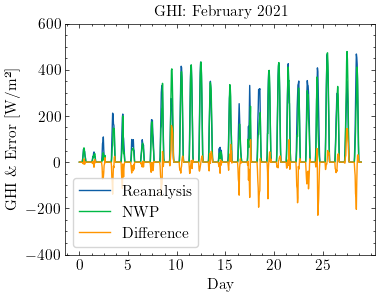

In [36]:
reanal_feb = openmeteo["2021-02-01":"2021-03-01"]
nwp_feb = ceda["2021-02-01":"2021-03-01"]
plt.figure(figsize=(4,3))
days = 29
plt.plot(range(days*24),reanal_feb["downward_surface_SW_flux"], label="Reanalysis")
plt.plot(range(days*24),nwp_feb["downward_surface_SW_flux"], label="NWP")
plt.plot(range(days*24),nwp_feb['downward_surface_SW_flux']-reanal_feb['downward_surface_SW_flux'], label="Difference")
plt.ylabel(r"GHI \& Error [W/m²]", fontsize=11)
plt.xlabel("Day", fontsize=11)
plt.xticks(24*np.arange(0,days,5), labels=np.arange(0,days,5), fontsize=11, rotation=0)
plt.yticks(fontsize=11)
plt.ylim([-400,600])
plt.legend(fontsize=11, frameon=True)
plt.title("GHI: February 2021", fontsize=11)
plt.savefig("Figures/evaluation/febr2021/ghi", dpi=200)

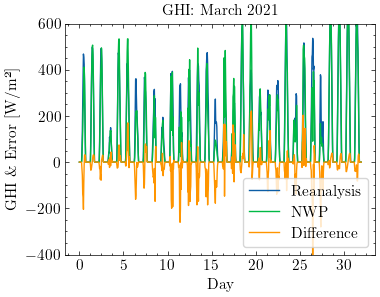

In [37]:
reanal_march = openmeteo["2021-03-01":"2021-04-01"]
nwp_march = ceda["2021-03-01":"2021-04-01"]
days=32
plt.figure(figsize=(4,3))
plt.plot(range(days*24),reanal_march["downward_surface_SW_flux"], label="Reanalysis")
plt.plot(range(days*24),nwp_march["downward_surface_SW_flux"], label="NWP")
plt.plot(range(days*24),nwp_march['downward_surface_SW_flux']-reanal_march['downward_surface_SW_flux'], label="Difference")
plt.ylabel(r"GHI \& Error [W/m²]", fontsize=11)
plt.xlabel("Day", fontsize=11)
plt.xticks(24*np.arange(0,days,5), labels=np.arange(0,days,5), fontsize=11, rotation=0)
plt.yticks(fontsize=11)
plt.ylim([-400,600])

plt.legend(fontsize=11, frameon=True)
plt.title("GHI: March 2021", fontsize=11)
plt.savefig("Figures/evaluation/febr2021/ghi_march", dpi=200)

Not in Colab environment: Using .pkl files
2020-05-01 00:00:00+00:00       0.0
2020-05-01 01:00:00+00:00       0.0
2020-05-01 02:00:00+00:00       0.0
2020-05-01 03:00:00+00:00       0.0
2020-05-01 04:00:00+00:00       0.0
2020-05-01 05:00:00+00:00      89.0
2020-05-01 06:00:00+00:00     210.0
2020-05-01 07:00:00+00:00     617.0
2020-05-01 08:00:00+00:00     437.0
2020-05-01 09:00:00+00:00     727.0
2020-05-01 10:00:00+00:00     985.0
2020-05-01 11:00:00+00:00     290.0
2020-05-01 12:00:00+00:00     741.0
2020-05-01 13:00:00+00:00    1936.0
2020-05-01 14:00:00+00:00    1445.0
2020-05-01 15:00:00+00:00     696.0
2020-05-01 16:00:00+00:00     723.0
2020-05-01 17:00:00+00:00     371.0
2020-05-01 18:00:00+00:00      71.0
2020-05-01 19:00:00+00:00       0.0
Name: P, dtype: float64


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


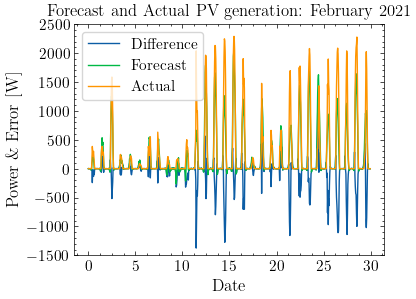

In [55]:
with open(f"DA_forecasts/DA_0_0", 'rb') as f:
    DA_forecast = pickle.load(f)
month = 9
_,_,eval_data =data_handeler(installation_int, "nwp", "nwp", "nwp", transform = False)
power = eval_data['P']
days=30
feb_DA_forecast = DA_forecast.iloc[(month*30+0)*24:((month+0)*30+30)*24] #(30 days *24
feb_power = power.iloc[(month*30+1)*24:((month+0)*30+31)*24] ###CHANGE BACK TO  31
# plt.plot(range(len(DA_forecast.index)),DA_forecast, label="Forecast")
# plt.plot(range(len(DA_forecast.index)),power, label="Actual")
substr = (feb_DA_forecast-feb_power)
plt.figure(figsize=(4,3))
plt.plot(range(days*24),substr, label = "Difference")
plt.plot(range(days*24),feb_DA_forecast, label = "Forecast")
plt.plot(range(days*24),feb_power, label="Actual")
plt.ylabel(r"Power \& Error [W]", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.xticks(24*np.arange(0,days+1,5), labels=np.arange(0,days+1,5),fontsize=11, rotation=0)
plt.yticks(fontsize=11)
plt.ylim([-1500,2500])
plt.title("Forecast and Actual PV generation: February 2021", fontsize=12)
plt.legend(fontsize=11, frameon=True)
plt.savefig("Figures/evaluation/febr2021/PV", dpi=200)

Not in Colab environment: Using .pkl files
2020-05-01 00:00:00+00:00       0.0
2020-05-01 01:00:00+00:00       0.0
2020-05-01 02:00:00+00:00       0.0
2020-05-01 03:00:00+00:00       0.0
2020-05-01 04:00:00+00:00       0.0
2020-05-01 05:00:00+00:00      89.0
2020-05-01 06:00:00+00:00     210.0
2020-05-01 07:00:00+00:00     617.0
2020-05-01 08:00:00+00:00     437.0
2020-05-01 09:00:00+00:00     727.0
2020-05-01 10:00:00+00:00     985.0
2020-05-01 11:00:00+00:00     290.0
2020-05-01 12:00:00+00:00     741.0
2020-05-01 13:00:00+00:00    1936.0
2020-05-01 14:00:00+00:00    1445.0
2020-05-01 15:00:00+00:00     696.0
2020-05-01 16:00:00+00:00     723.0
2020-05-01 17:00:00+00:00     371.0
2020-05-01 18:00:00+00:00      71.0
2020-05-01 19:00:00+00:00       0.0
Name: P, dtype: float64


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


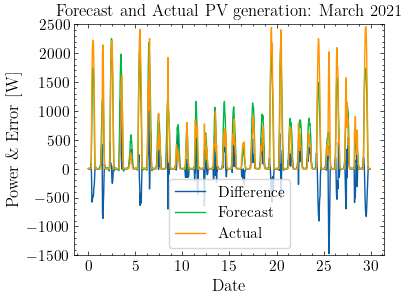

In [57]:
with open(f"DA_forecasts/DA_0_0", 'rb') as f:
    DA_forecast = pickle.load(f)
month = 10
_,_,eval_data =data_handeler(installation_int, "nwp", "nwp", "nwp", transform = False)
power = eval_data['P']
mar_DA_forecast = DA_forecast.iloc[(month*30+0)*24:((month+0)*30+30)*24] #(30 days *24
mar_power = power.iloc[(month*30+1)*24:((month+0)*30+31)*24] ###CHANGE BACK TO  31
# plt.plot(range(len(DA_forecast.index)),DA_forecast, label="Forecast")
# plt.plot(range(len(DA_forecast.index)),power, label="Actual")
days=30
substr = (mar_DA_forecast-mar_power)
plt.figure(figsize=(4,3))
plt.plot(range(days*24),substr, label = "Difference")
plt.plot(range(days*24),mar_DA_forecast, label = "Forecast")
plt.plot(range(days*24),mar_power, label="Actual")
plt.ylabel(r"Power \& Error [W]", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.xticks(24*np.arange(0,days+1,5), labels=np.arange(0,days+1,5),fontsize=11, rotation=0)
plt.yticks(fontsize=11)
plt.ylim([-1500,2500])

plt.title("Forecast and Actual PV generation: March 2021", fontsize=12)
plt.legend(fontsize=11, frameon=True)
plt.savefig("Figures/evaluation/febr2021/PV_march", dpi=200)

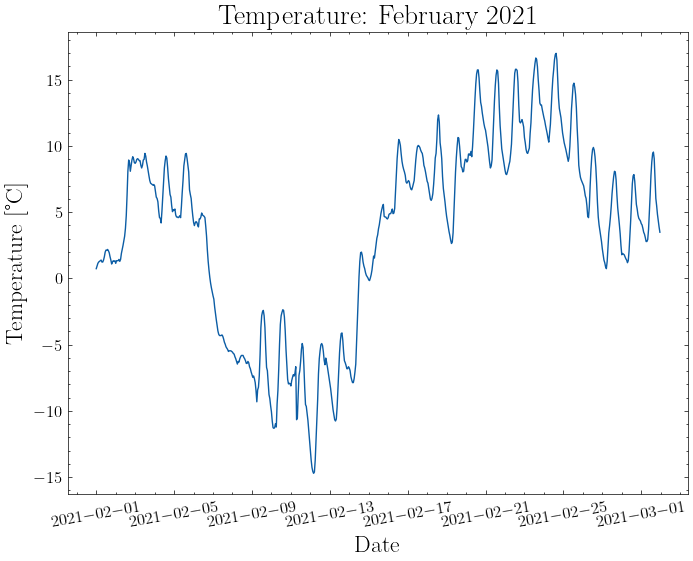

In [95]:
plt.figure(figsize=(8,6))
plt.plot(reanal_feb["temperature_1_5m"]-273.15)
plt.ylabel("Temperature [°C]", fontsize=17)
plt.xlabel("Date", fontsize=17)
plt.xticks(fontsize=12, rotation=10)
plt.yticks(fontsize=12)

plt.title("Temperature: February 2021", fontsize=20)
plt.savefig("Figures/evaluation/febr2021/temp", dpi=200)


-7.319494628906227